### Ce notebook est un redo du notebook PhylogenicTree avec la librarie networkx

In [4]:

import os
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('max_colwidth', 1000)

#pip3 install biopython
from Bio.Phylo.BaseTree import Tree, Clade
from Bio import Phylo

import networkx as nx
import matplotlib.pyplot as plt


#### Exemple de creation de graph, de type Tree

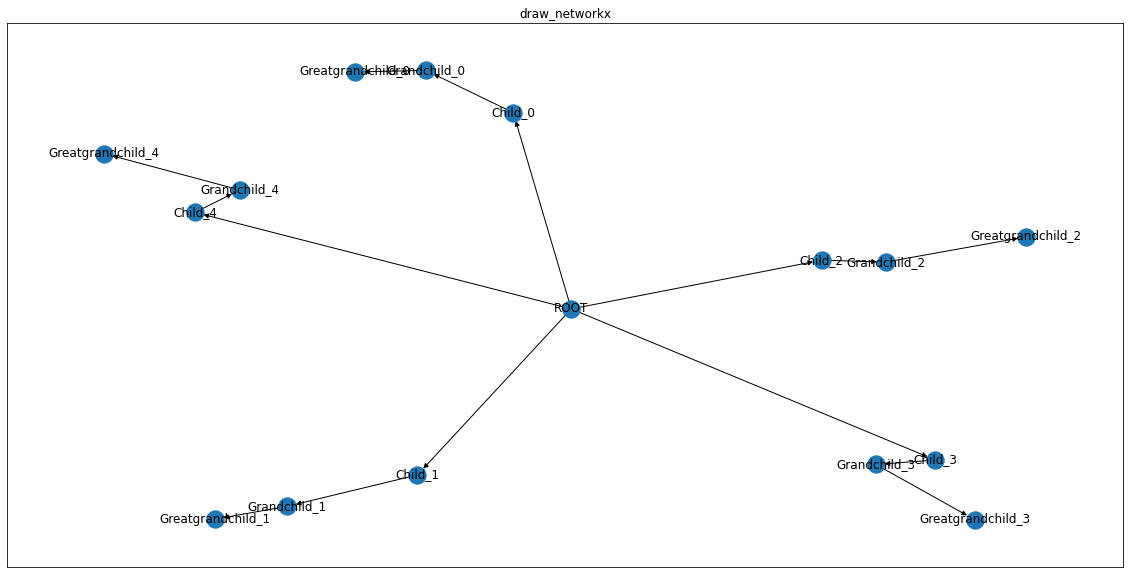

is a tree graph kind ? True
search all leaves from a tree
['Greatgrandchild_0', 'Greatgrandchild_1', 'Greatgrandchild_2', 'Greatgrandchild_3', 'Greatgrandchild_4']


In [8]:
def get_same_leaf_species(G, root):
    ''' recherche de feuilles '''   
    
    paths = []
    leafs = []
    for node in G:
        if G.out_degree(node)==0: #it's a leaf
            leafs.append(node)
            paths.append(nx.shortest_path(G, "ROOT", node))
    print('search all leaves from a tree')        
    print(leafs)
    
def example():
    G = nx.DiGraph()
    
    G.add_node("ROOT")
    
    for i in range(0, 5):
        G.add_node("Child_%i" % i)
        G.add_node("Grandchild_%i" % i)
        G.add_node("Greatgrandchild_%i" % i)
    
        G.add_edge("ROOT", "Child_%i" % i)
        G.add_edge("Child_%i" % i, "Grandchild_%i" % i)
        G.add_edge("Grandchild_%i" % i, "Greatgrandchild_%i" % i)
    
    plt.figure(figsize=(20,10))
    plt.title("draw_networkx")
    nx.draw_networkx(G)    
    plt.show() 
    
    # print(nx.shortest_path(G,source="Child_2",target="Grandchild_3"))
    print('is a tree graph kind ?', nx.is_tree(G))
    #[k for k,v in G.out_degree().iteritems() if v > 0]
    dict(nx.bfs_successors(G, "ROOT"))
    dict(nx.bfs_successors(G,'Grandchild_1'))
    
    paths = []
    for node in G:
        if G.out_degree(node)==0: #it's a leaf
            paths.append(nx.shortest_path(G, "ROOT", node))
    get_same_leaf_species(G, "ROOT")
example()

#### - Load species from data gbif

In [9]:

def load_species():
    ''' load species '''
    ordered_cols = ['kingdom','phylum','class','family','order','genus','species']
    descending_ranks = ordered_cols.copy()
    descending_ranks.reverse()
    print('ordered_cols: ', ordered_cols)
    print('descending_ranks: ', descending_ranks)
    df = pd.read_csv(
        r'..\data\gbif_extract.csv',
        usecols=['kingdom','phylum','class','order','family','species','scientificName', 'canonicalName','genus','rank']
    )
    #filtering rows related to species & filtering in taxonimic descending order 
    df_species = df.loc[(df['rank'] == 'SPECIES')][descending_ranks].copy(deep=True)
    # todo : manage species with nan  values
    species = df_species.dropna(how='any').values
    print('nb species:', species.shape)
    return species, ordered_cols, descending_ranks

#### recursive tree functions creation 

In [13]:
# Flat taxonomic array sequence to Tree Object
def to_tree(l:list, descending_ranks, G=None):
    '''transform a list into a TreeNode Object (branch)
    ---parameters---
    input: list containing taxonomic classification sequence 
    ordered like so ['kingdom', 'phylum', 'class', 'family', 'order', 'genus', 'species']
    '''
    
    if G is None:
        G = nx.DiGraph()

    taxonomicTree = l[0]
    G.add_node(taxonomicTree)   
    for i in range(1, len(l)):
        G.add_node(l[i])
        G.add_edge(l[i], taxonomicTree)
        taxonomicTree = l[i]      
    return G

# Wrapper : taxomic array matrix to Nested dictionnary
def data_to_tree(data, descending_ranks):
    '''transforms array matrix to TreeNode Object 
    '''
    G = None
    for row in data:
        G = to_tree(row, descending_ranks, G)
    return G


#### Creat species tree

ordered_cols:  ['kingdom', 'phylum', 'class', 'family', 'order', 'genus', 'species']
descending_ranks:  ['species', 'genus', 'order', 'family', 'class', 'phylum', 'kingdom']
nb species: (80419, 7)
[array(['Caldisphaera lagunensis', 'Caldisphaera', 'Acidilobales',
       'Caldisphaeraceae', 'Thermoprotei', 'Crenarchaeota', 'Archaea'],
      dtype=object), array(['Pyrodictium occultum', 'Pyrodictium', 'Desulfurococcales',
       'Pyrodictiaceae', 'Thermoprotei', 'Crenarchaeota', 'Archaea'],
      dtype=object)]


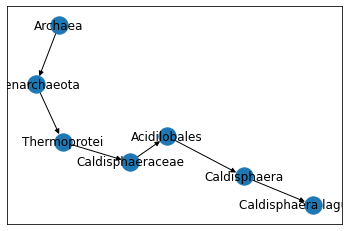

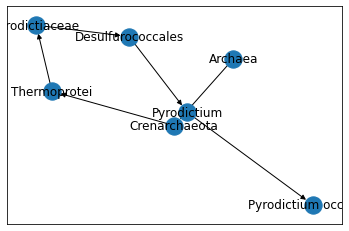

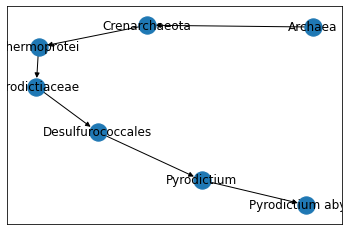

full tree created


In [12]:
def create_species_tree():
    ''' create species tree'''
    
    species, ordered_cols, descending_ranks = load_species()
    print(list(species[:2]))
    tree_A = to_tree(species[0], descending_ranks)
    tree_B = to_tree(species[1], descending_ranks)
    tree_C = to_tree(species[2], descending_ranks)
    nx.draw_networkx(tree_A)    
    plt.show() 
    nx.draw_networkx(tree_B)    
    plt.show() 
    nx.draw_networkx(tree_C)    
    plt.show() 
    
    # full tree : kingdom -> species
    tree_of_life = data_to_tree(species, descending_ranks)
    print('full tree created')
    
create_species_tree()